### Práctica SVC

#### Con el mismo set de datos que en el ejemplo, crea un modelo SVC radial y compara los resultados con el lineal del ejemplo.
#### Además, dibuja los vectores de soporte, los márgenes y la línea divisoria del modelo.

In [26]:
import matplotlib.pyplot as plt, numpy as np, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [27]:
# cargar dats
df = pd.read_csv("ejemplo_dataset.csv")
# train/test
X = df.drop(columns = 'y')
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y.values.reshape(-1,1), train_size = 0.8, random_state = 1234)
# SVC lineal
svc_l = SVC(C = 1, kernel = 'linear', random_state=123)
svc_l.fit(X_train, y_train)
# SVC radial
svc_r = SVC(C = 1, kernel = 'rbf', random_state=123)
svc_r.fit(X_train, y_train)
# predicciones
pred_l = svc_l.predict(X_test)
pred_r = svc_r.predict(X_test)

c:\Users\eroteta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\eroteta\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Text(0.5, 1.0, 'Datos de entrenamiento')

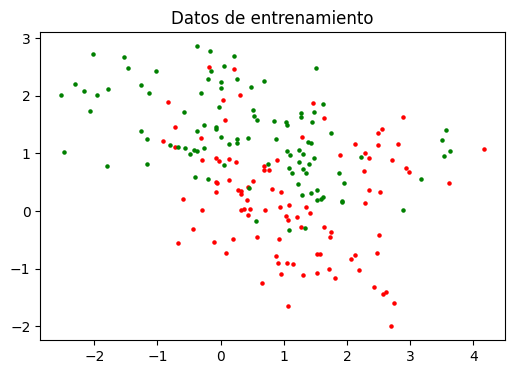

In [28]:
fig, ax = plt.subplots(figsize=(6,4))
colors = {0: 'red', 1:'green'}
for c in np.unique(df.y):
    i = df['y']==c
    ax.scatter(df.loc[i, 'X1'], df.loc[i, 'X2'], c=colors[c], s=5)
ax.set_title('Datos de entrenamiento')

Text(0.5, 1.0, 'SVC radial')

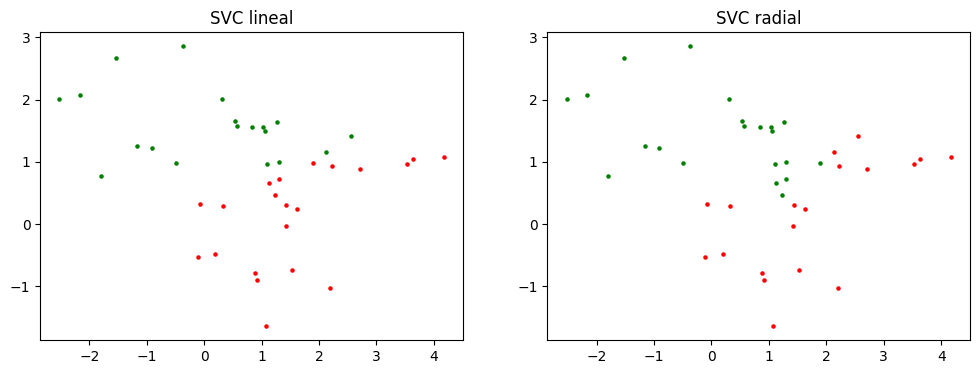

In [29]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
for c in np.unique(df.y):
    i = pred_l==c
    ax[0].scatter(X_test.loc[i, 'X1'], X_test.loc[i, 'X2'], c=colors[c], s=5)
    i = pred_r==c
    ax[1].scatter(X_test.loc[i, 'X1'], X_test.loc[i, 'X2'], c=colors[c], s=5)
ax[0].set_title('SVC lineal')
ax[1].set_title('SVC radial')

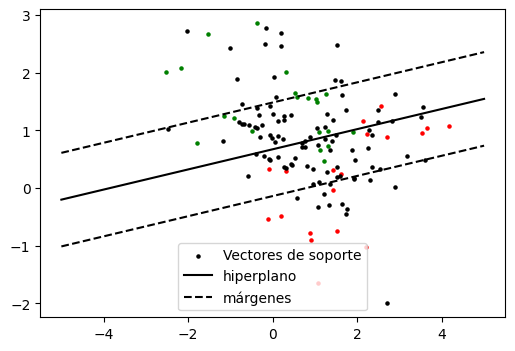

In [30]:
fig, ax = plt.subplots(figsize=(6, 4))
for c in np.unique(df.y):
    i = pred_r==c
    ax.scatter(X_test.loc[i, 'X1'], X_test.loc[i, 'X2'], c=colors[c], s=5)
# vectores de soporte
support_vector_indices = svc_l.support_
support_vectors_per_class = svc_l.n_support_
support_vectors = svc_r.support_vectors_
plt.scatter(support_vectors[:,0], support_vectors[:,1], color='black', s=5, label='Vectores de soporte')
# hiperplano
w = svc_l.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (svc_l.intercept_[0]) / w[1]
plt.plot(xx, yy, "k-", label='hiperplano')
# márgenes
margin = 1 / np.sqrt(np.sum(svc_l.coef_**2))
yy_down = yy - np.sqrt(1 + a**2) * margin
yy_up = yy + np.sqrt(1 + a**2) * margin
plt.plot(xx, yy_down, "k--", label='márgenes')
plt.plot(xx, yy_up, "k--")
plt.legend(loc='best')